1. What are the highest grossing movies?

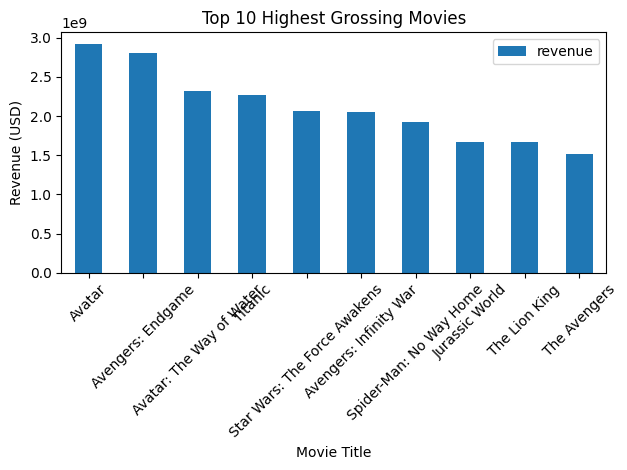

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset into DataFrame
df = pd.read_csv('dataset.csv') 

# Sort by revenue and select top 10 rows
top10 = df.sort_values('revenue', ascending=False).head(10)

# Plot bar chart 
ax = top10.plot.bar(x='title', y='revenue', rot=45)

ax.set_xlabel("Movie Title")
ax.set_ylabel("Revenue (USD)")
ax.set_title("Top 10 Highest Grossing Movies")

plt.tight_layout()
plt.show()

2. How have movie revenues changed over time?

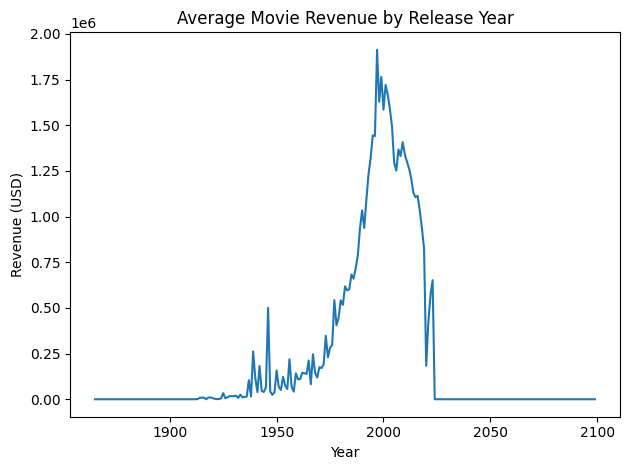

In [2]:
# Filter to only include movies with revenue data
df = df[df['revenue'].notnull()] 

# Convert release date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract year from release date 
df['year'] = df['release_date'].dt.year

# Group by year and calculate average revenue
rev_by_year = df.groupby('year')['revenue'].mean().reset_index()

# Plot line chart
plt.plot(rev_by_year['year'], rev_by_year['revenue'])

plt.title('Average Movie Revenue by Release Year')
plt.xlabel('Year')  
plt.ylabel('Revenue (USD)')

plt.tight_layout()
plt.show()

3. What movie genres earn the most revenue?

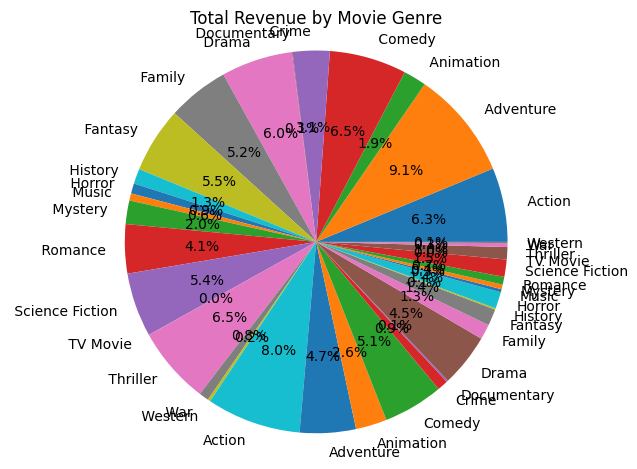

In [3]:
# Filter movies with revenue data 
df = df[df['revenue'].notnull()]

# Extract genres and split into separate columns
df['genres'] = df['genres'].str.split(',')
df = df.explode('genres')

# Group by genre and sum revenues
revenue_by_genre = df.groupby('genres')['revenue'].sum().reset_index()

# Create pie chart 
plt.pie(revenue_by_genre['revenue'], labels=revenue_by_genre['genres'], autopct='%1.1f%%')
plt.title('Total Revenue by Movie Genre')
plt.axis('equal') 

plt.tight_layout()
plt.show()

4. What months see the most movie releases?

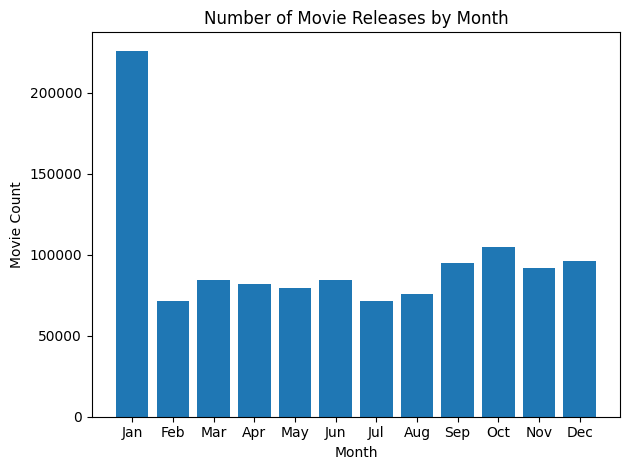

In [6]:
# Convert release date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract month number into new column 
df['month'] = df['release_date'].dt.month

# Count movies released by month
releases_by_month = df.groupby('month').size().reset_index(name='count')

# Plot bar chart
plt.bar(releases_by_month['month'], releases_by_month['count'])

plt.xlabel('Month')
plt.ylabel('Movie Count')
plt.title('Number of Movie Releases by Month')

# Add month labels
plt.xticks(releases_by_month['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()

5. How long is the average movie runtime?

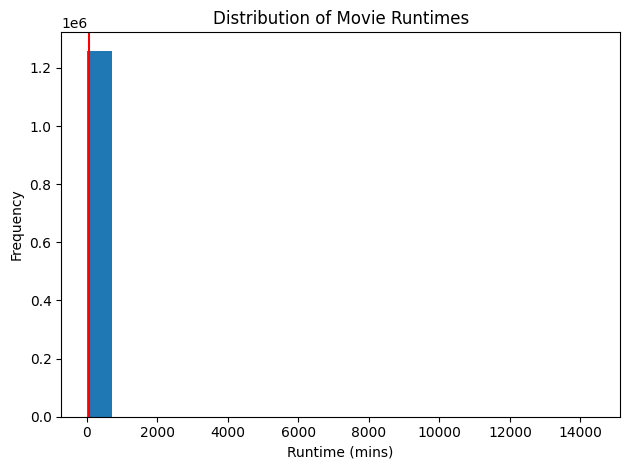

In [5]:
# Filter movies with runtime data
df = df[df['runtime'].notnull()]

# Calculate average runtime 
mean_runtime = df['runtime'].mean()

# Create histogram 
plt.hist(df['runtime'], bins=20)

# Add vertical line to highlight mean
plt.axvline(mean_runtime, color='r')

plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (mins)')
plt.ylabel('Frequency')

plt.tight_layout() 
plt.show()

6. How have runtimes changed over time?

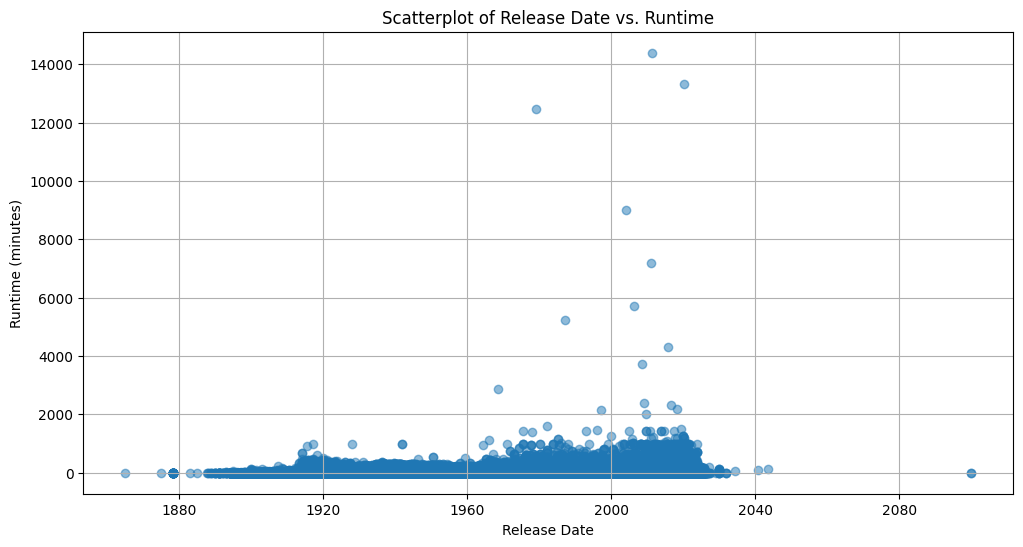

In [8]:
# Extract relevant columns (release_date and runtime)
release_dates = pd.to_datetime(df['release_date'], errors='coerce')
runtimes = df['runtime']

# Create a scatterplot
plt.figure(figsize=(12, 6))
plt.scatter(release_dates, runtimes, alpha=0.5)  # Use alpha to control point transparency
plt.title('Scatterplot of Release Date vs. Runtime')
plt.xlabel('Release Date')
plt.ylabel('Runtime (minutes)')
plt.grid(True)

# Show the plot
plt.show()


7. Which production companies release the most movies?

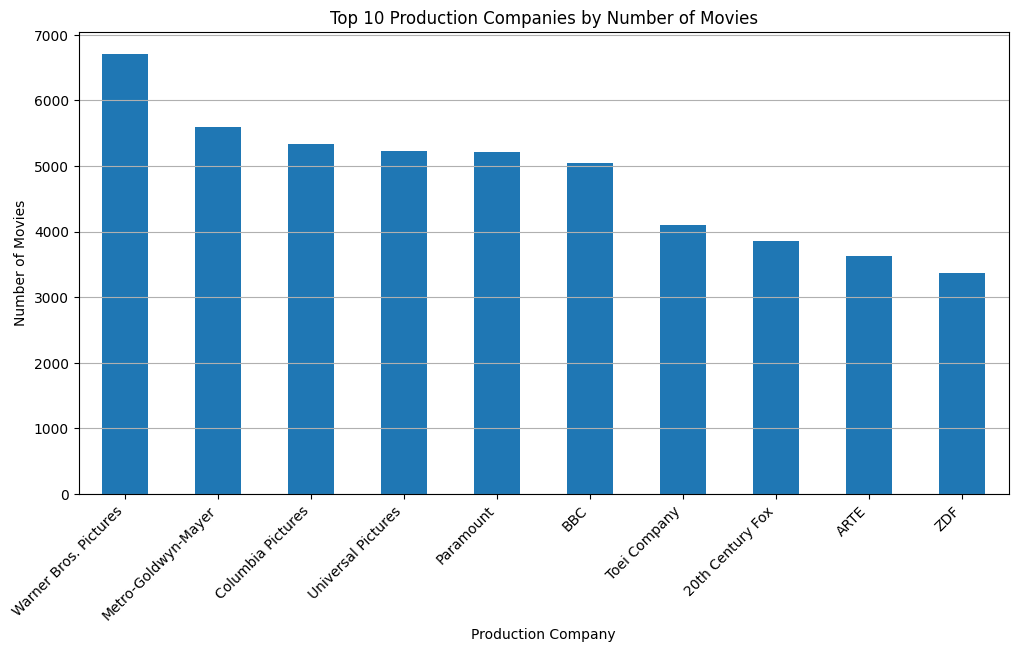

In [9]:
# Group data by production company and count the number of movies
production_companies_counts = df['production_companies'].str.split(',').explode().str.strip()
production_company_counts = production_companies_counts.value_counts()

# Select the top N production companies with the most movies
top_n = 10  # Change this to show the top N production companies
top_production_companies = production_company_counts.head(top_n)

# Create a bar chart
plt.figure(figsize=(12, 6))
top_production_companies.plot(kind='bar')
plt.title('Top {} Production Companies by Number of Movies'.format(top_n))
plt.xlabel('Production Company')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y')

# Show the plot
plt.show()


8. What is the relationship between budget and revenue?

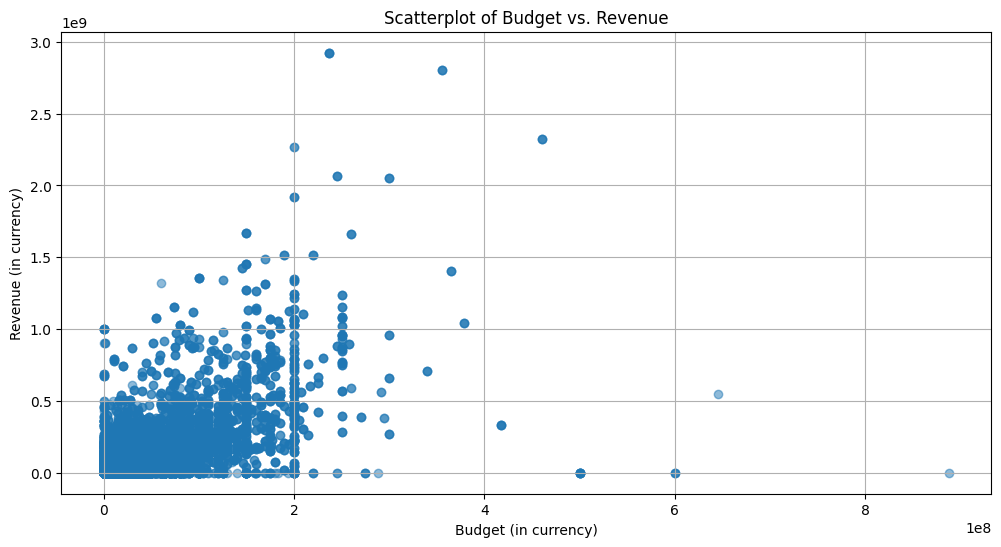

In [11]:
# Extract the 'budget' and 'revenue' columns
budget = df['budget']
revenue = df['revenue']

# Create a scatterplot
plt.figure(figsize=(12, 6))
plt.scatter(budget, revenue, alpha=0.5)  # Use alpha to control point transparency
plt.title('Scatterplot of Budget vs. Revenue')
plt.xlabel('Budget (in currency)')
plt.ylabel('Revenue (in currency)')
plt.grid(True)

# Show the plot
plt.show()


9. What are the highest rated movie genres?

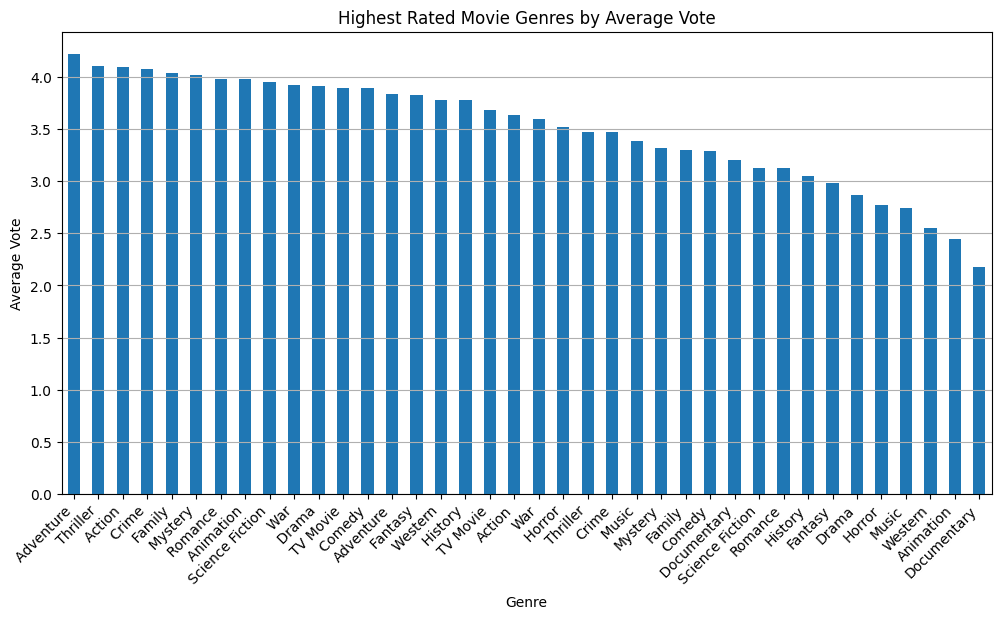

In [12]:
# Extract the 'genres' and 'vote_average' columns
genres = df['genres']
vote_average = df['vote_average']

# Create a new DataFrame with 'genres' and 'vote_average' columns
data = pd.DataFrame({'Genres': genres, 'Average Vote': vote_average})

# Group data by genre and calculate the average vote for each genre
genre_avg_vote = data.groupby('Genres')['Average Vote'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
genre_avg_vote.plot(kind='bar')
plt.title('Highest Rated Movie Genres by Average Vote')
plt.xlabel('Genre')
plt.ylabel('Average Vote')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y')

# Show the plot
plt.show()


10. Do higher budgets lead to higher revenues?

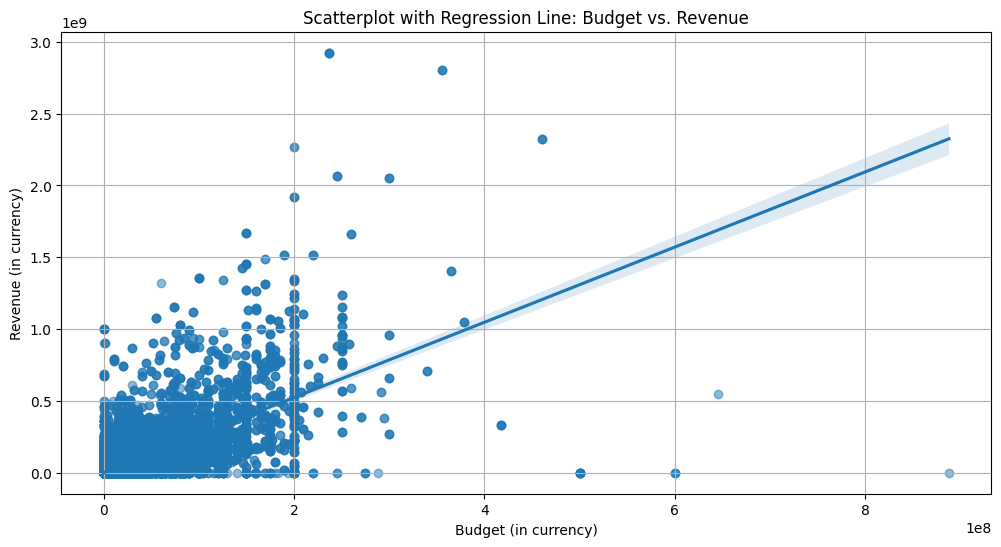

In [16]:
import seaborn as sns

# Extract the 'budget' and 'revenue' columns
budget = df['budget']
revenue = df['revenue']

# Create a scatterplot with a regression line
plt.figure(figsize=(12, 6))
sns.regplot(x=budget, y=revenue, scatter_kws={"alpha":0.5})
plt.title('Scatterplot with Regression Line: Budget vs. Revenue')
plt.xlabel('Budget (in currency)')
plt.ylabel('Revenue (in currency)')
plt.grid(True)

# Show the plot
plt.show()


11. How do revenues of sequels compare to originals?

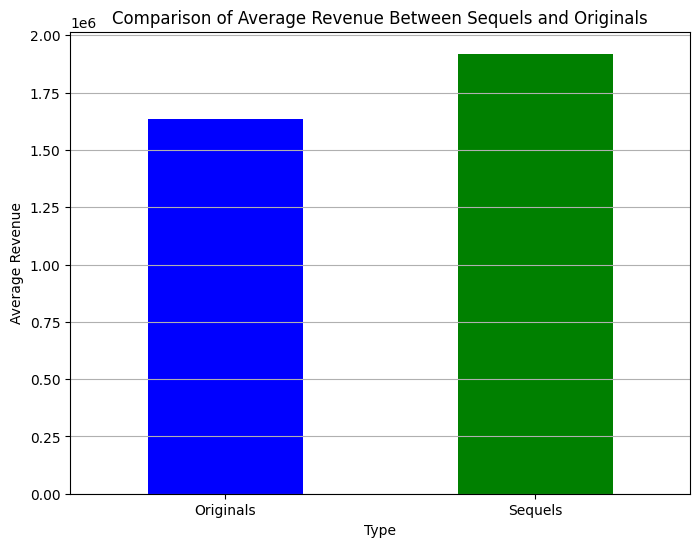

In [19]:
# Assuming you have a column 'title' that indicates the movie title and whether it's a sequel or an original.
# Create a new column 'sequel' to identify sequels.
df['sequel'] = df['title'].str.contains('2|II|3|III|4|IV|5|V')  # Adjust the regex pattern as needed

# Group data by 'sequel' and calculate the mean revenue for each group
revenue_comparison = df.groupby('sequel')['revenue'].mean()

# Create a bar chart to compare the average revenue between sequels and originals
plt.figure(figsize=(8, 6))
revenue_comparison.plot(kind='bar', rot=0, color=['blue', 'green'])
plt.title('Comparison of Average Revenue Between Sequels and Originals')
plt.xlabel('Type')
plt.ylabel('Average Revenue')
plt.xticks([0, 1], ['Originals', 'Sequels'])
plt.grid(axis='y')

# Show the plot
plt.show()


12. What is the market share of major studios?

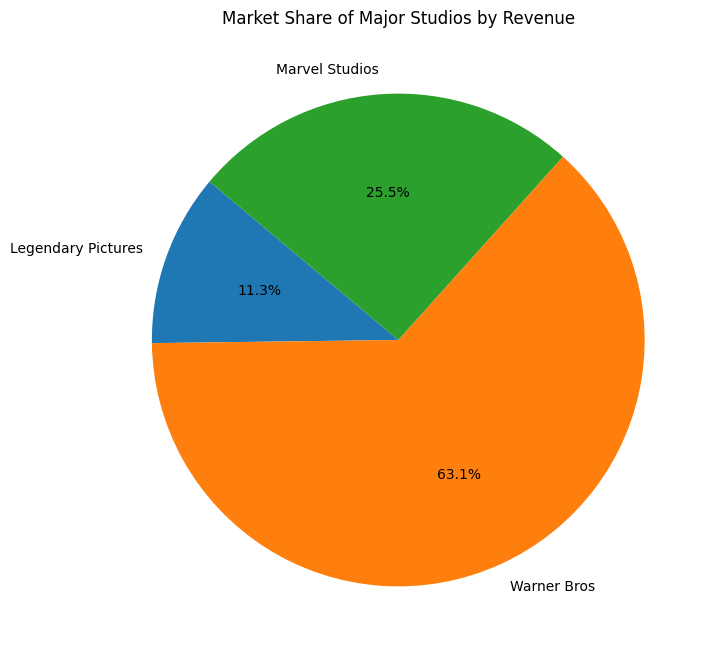

In [33]:
# Filter and clean the data to exclude rows with missing or NaN values in the relevant columns
df = df.dropna(subset=['production_companies', 'revenue'])

# Extract the 'production_companies' and 'revenue' columns
production_companies = df['production_companies']
revenue = df['revenue']

# Define a list of major studios
major_studio_names = ['Legendary Pictures', 'Warner Bros', 'Marvel Studios']
major_studios = major_studio_names  # Use the list of major studio names

# Filter the data to include only movies produced by major studios
df_major_studios = df[df['production_companies'].str.contains('|'.join(major_studios))]

# Calculate the total revenue for major studios
total_revenue_major_studios = df_major_studios['revenue'].sum()

# Calculate the revenue share for each major studio
revenue_shares = []
for studio in major_studios:
    studio_revenue = df_major_studios[df_major_studios['production_companies'].str.contains(studio)]['revenue'].sum()
    revenue_share = studio_revenue / total_revenue_major_studios
    revenue_shares.append(revenue_share)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(revenue_shares, labels=major_studios, autopct='%1.1f%%', startangle=140)
plt.title('Market Share of Major Studios by Revenue')

# Show the plot
plt.show()

13. How have the number of yearly releases changed over time?

/home/u199225/tmp/ipykernel_385957/2510071480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_year'] = release_dates.dt.year


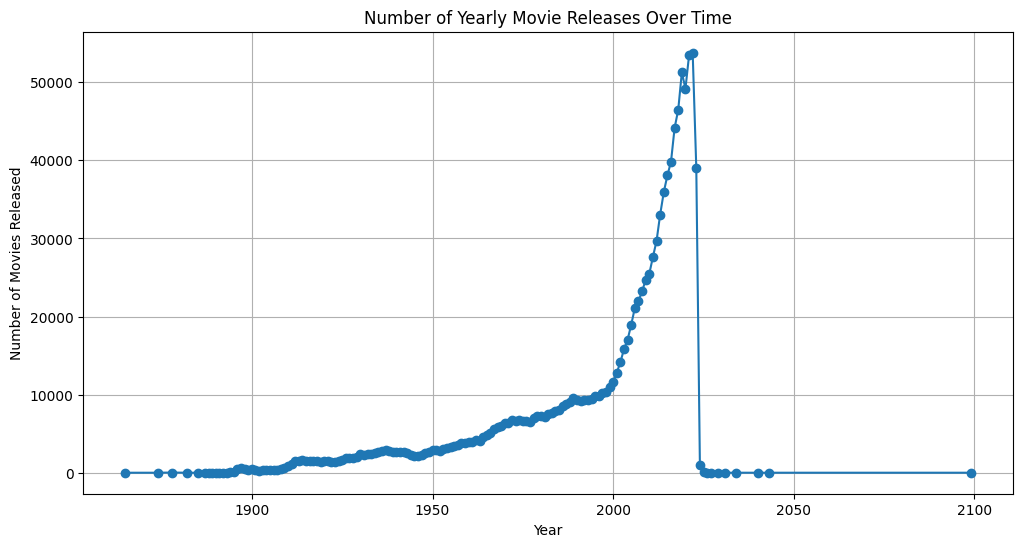

In [28]:
# Extract the 'release_date' column
release_dates = pd.to_datetime(df['release_date'], errors='coerce')

# Extract and manipulate the year from the release dates
df['release_year'] = release_dates.dt.year

# Group data by year and count the number of movies released each year
yearly_movie_counts = df['release_year'].value_counts().sort_index()

# Create a line chart to display the changes in yearly movie releases
plt.figure(figsize=(12, 6))
plt.plot(yearly_movie_counts.index, yearly_movie_counts.values, marker='o', linestyle='-')
plt.title('Number of Yearly Movie Releases Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.grid(True)

# Show the plot
plt.show()


14. What is the distribution of revenue values?

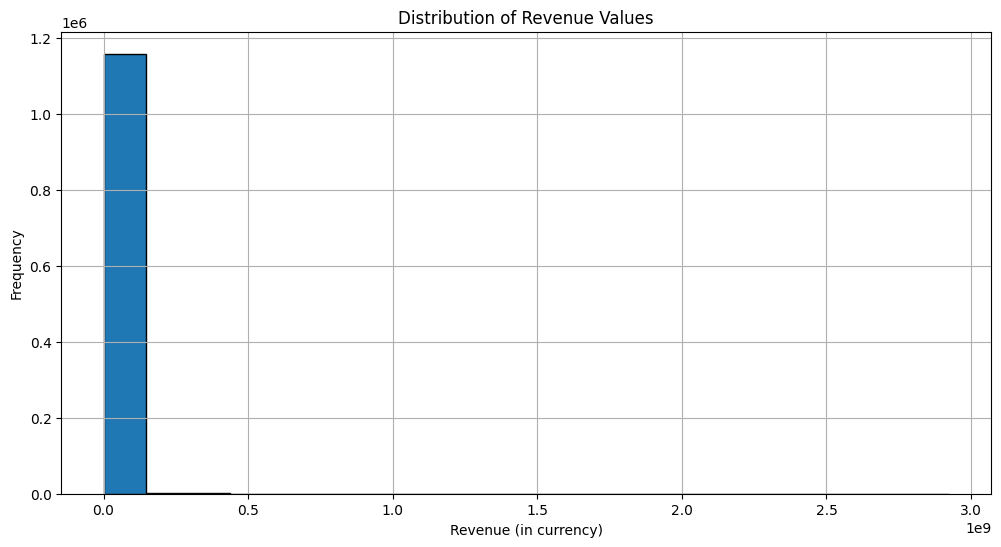

In [27]:
# Extract the 'revenue' column
revenue = df['revenue']

# Create a histogram to visualize the distribution of revenue values
plt.figure(figsize=(12, 6))
plt.hist(revenue, bins=20, edgecolor='k')
plt.title('Distribution of Revenue Values')
plt.xlabel('Revenue (in currency)')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()


15. What is the relationship between vote count and vote average?

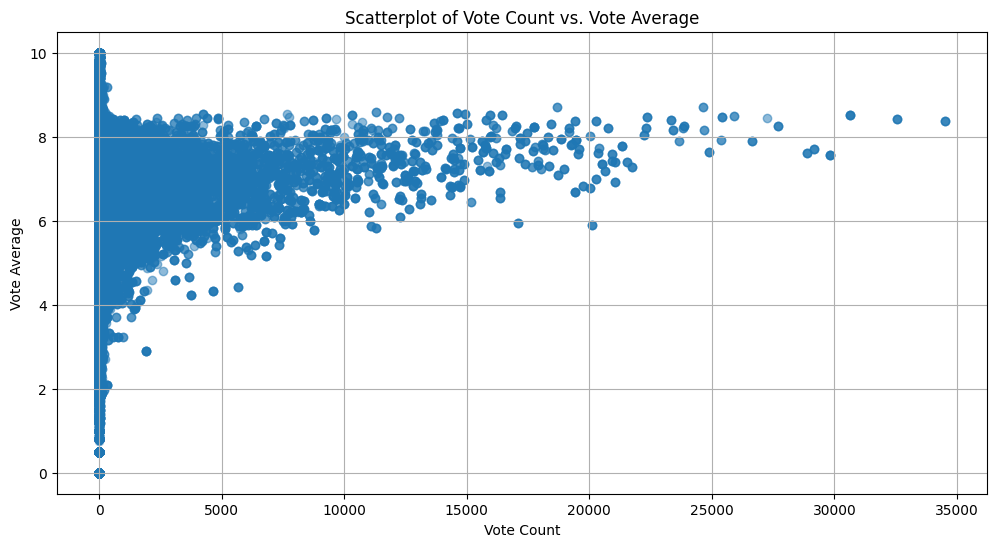

In [25]:
# Extract the 'vote_count' and 'vote_average' columns
vote_count = df['vote_count']
vote_average = df['vote_average']

# Create a scatterplot to visualize the relationship between vote count and vote average
plt.figure(figsize=(12, 6))
plt.scatter(vote_count, vote_average, alpha=0.5)
plt.title('Scatterplot of Vote Count vs. Vote Average')
plt.xlabel('Vote Count')
plt.ylabel('Vote Average')
plt.grid(True)

# Show the plot
plt.show()


16. Do longer runtimes lead to higher revenues?

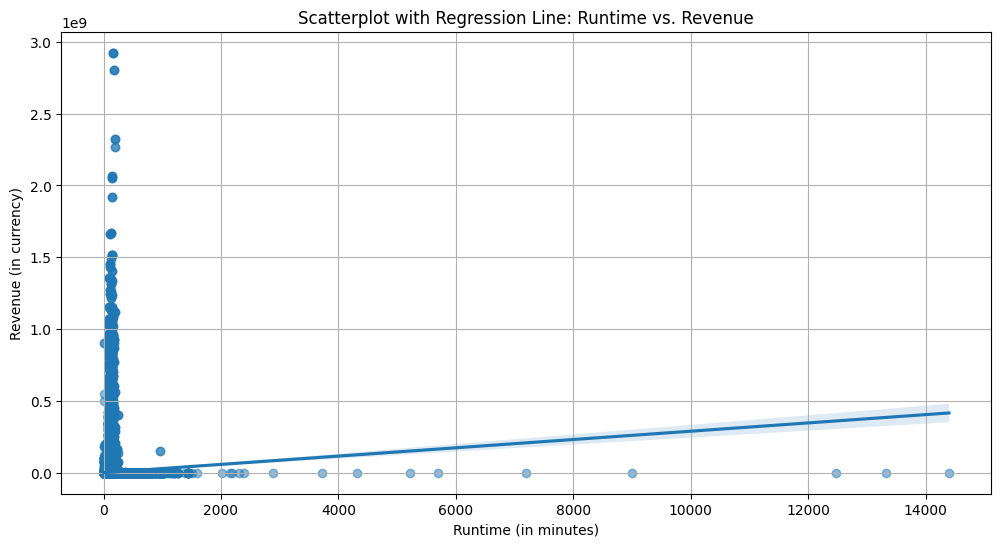

In [26]:
# Extract the 'runtime' and 'revenue' columns
runtime = df['runtime']
revenue = df['revenue']

# Create a scatterplot with a regression line
plt.figure(figsize=(12, 6))
sns.regplot(x=runtime, y=revenue, scatter_kws={"alpha":0.5})
plt.title('Scatterplot with Regression Line: Runtime vs. Revenue')
plt.xlabel('Runtime (in minutes)')
plt.ylabel('Revenue (in currency)')
plt.grid(True)

# Show the plot
plt.show()
